<a href="https://colab.research.google.com/github/joanitolopo/customer-segmentation/blob/main/k_prototypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install kmodes

In [4]:
# import main library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import librries for clustering
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from tqdm.auto import tqdm

from sklearn.preprocessing import LabelEncoder, StandardScaler

Import Data

In [7]:
#!git clone https://github.com/joanitolopo/customer-segmentation.git

In [24]:
data = pd.read_csv("/content/customer-segmentation/data/data_cleaned.csv", index_col=["ID"])
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,TotalAcceptedCmp,NumTotalPurchases
ID,,,,,,,,,,,,,,,
5524,Second,Single,58138.0,0,0,58,635,88,546,172,88,88,0,1,32
2174,Second,Single,46344.0,1,1,38,11,1,6,2,1,6,0,0,11
4141,Second,relationship,71613.0,0,0,26,426,49,127,111,21,42,0,0,25
6182,Second,relationship,26646.0,1,0,26,11,4,20,10,3,5,0,0,14
5324,Third,relationship,58293.0,1,0,94,173,43,118,46,27,15,0,0,24


Processing Data Quickly

In [25]:
# Encode categorical data become numeri
LE = LabelEncoder()
obj_col = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]
data[obj_col] = data[obj_col].apply(LE.fit_transform)

In [26]:
# Convert first data to array
array = data.values

# Convert numerical data to float
array[:, 5:11] = array[:,5:11].astype(float)
array[:, 2] = array[:,2].astype(float)
array[:, 13:15] = array[:,13:15].astype(float)

# get index of categorical columns, because algoritm need just their index
categorical_index = list(range(0,2)) + list(range(3, 5)) + [12]

Find Best Cluster for data use Elbow analysis

  0%|          | 0/8 [00:00<?, ?it/s]

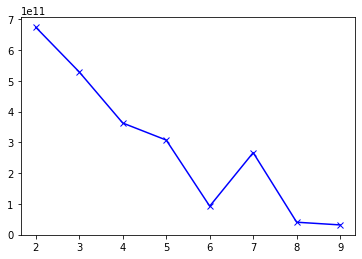

In [13]:
score = []
for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    member = model.fit_predict(array, categorical=categorical_index)
    score.append(model.cost_)

plt.plot(range(2, 10), score, 'bx-')

Training

In [35]:
model = KPrototypes(n_clusters=3, init='Huang', random_state=42, n_jobs=-1)
cluster = model.fit_predict(array, categorical=categorical_index)

In [36]:
df_pred = data.copy()
df_pred["cluster"] = cluster 
df_pred.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,TotalAcceptedCmp,NumTotalPurchases,cluster
ID,,,,,,,,,,,,,,,,
5524,1,0,58138.0,0,0,58,635,88,546,172,88,88,0,1,32,0
2174,1,0,46344.0,1,1,38,11,1,6,2,1,6,0,0,11,0
4141,1,1,71613.0,0,0,26,426,49,127,111,21,42,0,0,25,2
6182,1,1,26646.0,1,0,26,11,4,20,10,3,5,0,0,14,1
5324,2,1,58293.0,1,0,94,173,43,118,46,27,15,0,0,24,0


Analyse Cluster

In [37]:
cluster_kprop = model.cluster_centroids_
df_cluster = pd.DataFrame(cluster_kprop, columns=data.columns)
df_cluster

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,TotalAcceptedCmp,NumTotalPurchases
0,54486.100000,49.472289,324.200000,21.292771,115.428916,29.206024,20.457831,48.300000,0.314458,22.472289,1.0,1.0,0.0,1.0,0.0
1,29103.779188,48.590102,34.498731,6.152284,26.252538,9.308376,6.162437,18.284264,0.203046,14.958122,1.0,1.0,1.0,0.0,0.0
2,79636.568562,48.931438,635.137124,60.006689,424.030100,86.670569,63.645485,71.789298,0.958194,23.953177,1.0,1.0,0.0,0.0,0.0


In [38]:
pd.set_option('max_rows',None)
df_new = data.copy()
df_new['cluster'] = model.labels_
df_new.groupby('cluster').agg(['median' ,'mean'])

Education            ... NumTotalPurchases           
           median      mean  ...            median       mean
cluster                      ...                             
0               1  1.251807  ...                23  22.472289
1               1  1.097716  ...                14  14.958122
2               1  1.235786  ...                24  23.953177

[3 rows x 30 columns]

**Report**

``Cluser 0 : Middle Class`` 
- Education: graduation, master, 2n cycle
- Mrital status: married
- Income: 54486.100000
- Kidhome: Dont have child under 5 years
- Teenhome: Have teen
- Recency: 49 days or a month more come to the shop
- MntWines: 324 times
- MntFruits: 21 times
- MntMeatproduct: 115 times 
- MntFishproduct: 29 times
- MntSweetproduct: 20 times
- MntGoldproduct: 38 times
- Complain: no complain (tidak complan)
- TotalAcceptedCmp: not join the campaign
- Numtotalpurchase: 17 times

``Cluser 1 : Low Class`` 
- Education: graduation, master, 2n cycle
- Mrital status: married
- Income: 29103.779188
- Kidhome: Have kidhome
- Teenhome: Dont ave teenhome
- Recency: 49 days or a month more come to the shop
- MntWines: 34 times
- MntFruits: 6 times
- MntMeatproduct: 26 times 
- MntFishproduct: 9 times
- MntSweetproduct: 6 times
- MntGoldproduct: 18 times
- Complain: no complain
- TotalAcceptedCmp: not join the campaign
- Numtotalpurchase: 7 times

``Cluster 2 : High Class`` 
- Education: graduation, master, 2n cycle
- Mrital status: married
- Income: 79636.568562
- Kidhome: Dont have kidhome
- Teenhome: Dont have teenhome
- Recency: 49 days or a month more come to the shop
- MntWines: 635 times
- MntFruits: 60 times
- MntMeatproduct: 424 times 
- MntFishproduct: 86 times
- MntSweetproduct: 63 times
- MntGoldproduct: 71 times
- Complain: no complain
- TotalAcceptedCmp: not join the campaign
- Numtotalpurchase: 20 times